<a href="https://colab.research.google.com/github/smrutisanchita/CE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget "https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv"

--2021-05-04 13:05:17--  https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11712553 (11M) [text/plain]
Saving to: ‘jester-data-1.csv’

jester-data-1.csv   100%[===================>]  11.17M  --.-KB/s    in 0.06s   

2021-05-04 13:05:18 (177 MB/s) - ‘jester-data-1.csv’ saved [11712553/11712553]



In [ ]:
### Dataset description ###
# Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
# The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.
# The sub-matrix including only columns {5, 7, 8, 13, 15, 16, 17, 18, 19, 20} is dense.# Almost all users have rated those jokes.

**Data Analysis**

In [ ]:
jokes_df = pd.read_csv("jester-data-1.csv",header=None,na_values=99) # all the 99's get converted to NaN
jokes_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [ ]:
print("There are {} jokes rated by {} users ".format(jokes_df.shape[1]-1,jokes_df.shape[0]))

There are 100 jokes rated by 24983 users 


In [ ]:
#print("Number of NaNs in each column/ number of users that haven't rated each joke")
print("joke\tnumber of users didn't rate")
jokes_df.isnull().sum()


joke	number of users didn't rate


0         81
1       8531
2       6799
3       8341
4       9375
       ...  
96     14613
97     14463
98     14317
99     14073
100    15040
Length: 101, dtype: int64

In [ ]:
# Drop the first column(The first column gives the number of jokes rated by that user), this is not rating so we drop it
jokes_df.drop(columns=0,inplace=True)
jokes_df.shape

(24983, 100)

In [ ]:
# Use pandas to find the best- and the worst-rated jokes

In [ ]:
#best joke
print(jokes_df.describe().loc['mean'].idxmax(axis=1))
print(jokes_df.describe().loc['mean'].max())

50
3.6650848950824937


In [ ]:
# worst joke
print(jokes_df.describe().loc['mean'].idxmin(axis=1))
print(jokes_df.describe().loc['mean'].min())

58
-3.8338796373689923


In [ ]:
jokes_df.iloc[13051][18]

-8.5

In [ ]:
## Building Recommendation System(Collaborative Filtering)

In [ ]:
# Modify and use the helper function provided in the helper_function notebook (or create your own) to label 10% of the dataset cells that are not NaNs as 99.
# This is your validation set.
# Keep the the actual values of the cells so you can use them later (as done in the example of the helper_function notebook).

jokes = pd.read_csv("jester-data-1.csv",header=None,usecols=list(range(1,101)))
jokes.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00


In [ ]:
jokes.shape

(24983, 100)

In [ ]:
arr = jokes.values

def replace_func(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99) # indices where ratings are given

  shape=rated[0].shape
  values = np.ones((shape)) # an empty array to store the values before replacing them with 99
  n_rated = len(rated[0])   

  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False) # indices for validation dataset

  values = new_data[rated[0][idx],rated[1][idx]]
  #print(values.shape)

  new_data[rated[0][idx], rated[1][idx]] = 99                                  
  return new_data, (rated[0][idx], rated[1][idx]), values

In [ ]:
 new_data, indices ,values = replace_func(arr, percentage=0.1)
 new_data

array([[ 2.86,  1.75, -6.41, ..., -2.14,  0.92,  9.13],
       [ 3.93, -0.92,  3.59, ..., -4.03,  3.2 , -3.06],
       [-7.38, -9.17, -6.36, ..., 99.  , 99.  , 99.  ],
       ...,
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [ 2.43,  2.67, -3.98, ..., 99.  , 99.  , 99.  ]])

In [ ]:
# initialize the matrices with random floating numbers
num_latent_factors = 4
latent_user_preferences  = np.random.random((jokes.shape[0],num_latent_factors)) # shape: num of users by num of factors
latent_item_features = np.random.random((jokes.shape[1],num_latent_factors)) # shape: num of items by num of factors (how much each item has these factors)
print(latent_user_preferences.shape)
print(latent_item_features.shape)


(24983, 4)
(100, 4)


In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.00001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = arr[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
        mse_history.append(mse)
    return mse_history

Iteration 0/100:	MSE=657.528132
Iteration 1/100:	MSE=657.379725
Iteration 2/100:	MSE=657.196740
Iteration 3/100:	MSE=656.934490
Iteration 4/100:	MSE=656.531958
Iteration 5/100:	MSE=655.896280
Iteration 6/100:	MSE=654.881842
Iteration 7/100:	MSE=653.259632
Iteration 8/100:	MSE=650.673003
Iteration 9/100:	MSE=646.578323
Iteration 10/100:	MSE=640.177678
Iteration 11/100:	MSE=630.373905
Iteration 12/100:	MSE=615.825646
Iteration 13/100:	MSE=595.244475
Iteration 14/100:	MSE=568.080749
Iteration 15/100:	MSE=535.498925
Iteration 16/100:	MSE=500.946701
Iteration 17/100:	MSE=469.281184
Iteration 18/100:	MSE=444.479456
Iteration 19/100:	MSE=427.785971
Iteration 20/100:	MSE=417.910564
Iteration 21/100:	MSE=412.590154
Iteration 22/100:	MSE=409.865607
Iteration 23/100:	MSE=408.478136
Iteration 24/100:	MSE=407.743116
Iteration 25/100:	MSE=407.319897
Iteration 26/100:	MSE=407.044340
Iteration 27/100:	MSE=406.836224
Iteration 28/100:	MSE=406.654136
Iteration 29/100:	MSE=406.474675
Iteration 30/100:	MS

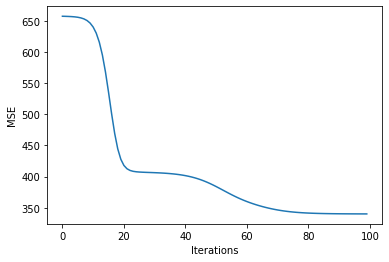

In [ ]:
num_iter = 100
hist = sgd(num_iter)  
plt.plot(np.arange(0, num_iter), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[ -5.8430363 ,  -7.39255412,  -8.16967702, ...,  79.29466273,
         76.67383235,  78.38970793],
       [  5.80229609,   5.10738105,   5.93635883, ...,   0.29219307,
          0.1398018 ,   1.09625992],
       [ 93.72257112,  81.63831353,  93.74198642, ...,  88.77961506,
         88.38230882,  96.09070324],
       ...,
       [ 99.31706919,  98.87666194, 101.60649157, ..., 102.33895148,
        101.27662586, 108.3728982 ],
       [102.2069711 , 106.80181296, 105.5431293 , ..., 105.79471432,
        104.91087854, 110.9267476 ],
       [  3.61877686,   2.0284435 ,   1.34724672, ...,  95.68700538,
         93.39755657,  94.60955223]])

In [ ]:
values = [zip(arr[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = jokes.columns


In [ ]:
comparison_data.head(10) # comparing original rating with rating predicted by recommender system

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -5.843036301422424)","(8.79, -7.392554118663883)","(-9.66, -8.16967702397188)","(-8.16, -5.652450045596483)","(-7.52, 0.0400639202565706)","(-8.5, -2.5056682757134183)","(-9.85, -0.5987680394729125)","(4.17, -0.7026159343083012)","(-8.98, -5.799349069748009)","(-4.76, -3.601224781020782)","(-8.5, -0.5390524452090564)","(-6.75, 0.759179076428401)","(-7.18, -1.934295351236217)","(8.45, 0.6611493548979289)","(-7.18, -1.787697351951069)","(-7.52, -3.3110889825634557)","(-7.43, -1.2667155527282772)","(-9.81, -0.7491351317606008)","(-9.85, -0.008335088027086138)","(-9.85, -0.900119633233399)","(-9.37, 1.8226545815951662)","(1.5, -2.291557668626894)","(-4.37, -5.968126099633629)","(-9.81, -5.612242312568521)","(-8.5, -3.7541990289003433)","(1.12, 0.5619770007544707)","(7.82, 3.1229399241110913)","(2.86, 0.8025949442344749)","(9.13, 2.8791791820009562)","(-7.43, -10.505444358606187)","(2.14, 1.9162061945189994)","(-4.08, 3.15200922114607)","(-9.08, -10.233966297408937)","(7.82, -2.581652922904549)","(5.05, 2.736689751704537)","(4.95, 3.082323808010511)","(-9.17, -9.314058537266316)","(-8.4, -0.3661058720880088)","(-8.4, 0.43463841431882044)","(-8.4, -0.7471010712508612)",...,"(8.59, 2.406905948407694)","(3.59, 2.93279664778909)","(-6.84, -6.442933164283464)","(-9.03, -10.075395930019244)","(2.82, 2.0442770291172327)","(-1.36, 2.376419414184453)","(-9.08, -9.941574253429058)","(8.3, 2.656107999225974)","(5.68, 2.4126856622194084)","(-4.81, -4.983331180353244)","(99.0, 85.21202071449623)","(99.0, 85.47612259320437)","(99.0, 86.02894845786162)","(99.0, 85.39848577074333)","(99.0, 85.41387834177435)","(99.0, 85.83781257260699)","(99.0, 86.19768170009979)","(-9.42, 86.16469132116644)","(99.0, 85.53164592108872)","(99.0, 86.30280721493749)","(99.0, 86.03825498416246)","(-7.72, 86.89051429594919)","(99.0, 86.14125075552934)","(99.0, 86.35363778061135)","(99.0, 87.44707106111682)","(99.0, 86.60697435434939)","(99.0, 87.23873438311338)","(99.0, 86.40525916648643)","(99.0, 86.97674847096832)","(99.0, 86.06851899968962)","(2.82, 86.64642156603641)","(99.0, 85.86265480341753)","(99.0, 85.18265340604468)","(99.0, 84.54412935232214)","(99.0, 84.485934393789)","(99.0, 83.07933159574678)","(-5.63, 81.28039038809854)","(99.0, 79.29466273102935)","(99.0, 76.67383234657565)","(99.0, 78.3897079299151)"
1,"(4.08, 5.8022960913331545)","(-0.29, 5.107381047302508)","(6.36, 5.936358825819732)","(4.37, 5.874233148561129)","(-2.38, 0.06439614847098635)","(-9.66, 3.403174710359854)","(-0.73, -0.0008922059404341545)","(-5.34, -0.028493164424117604)","(8.88, 5.847175663877227)","(9.22, 3.665931417963912)","(6.75, 2.352209171550228)","(8.64, 1.8342339594040589)","(4.42, -0.08516910902267252)","(7.43, 1.7535288360971306)","(4.56, -0.07783182210764099)","(-0.97, -0.15567655058827262)","(4.66, -0.03880351000917869)","(-0.68, -0.020449657726972333)","(3.3, 0.019967102972735247)","(-1.21, -0.0782794832378747)","(0.87, 0.19330832519193786)","(8.64, 2.8124554240359276)","(8.35, 3.9637815354289234)","(9.17, 5.624238756507161)","(0.05, 3.243812742007167)","(7.57, 0.9904277037072635)","(4.71, 0.238821249775197)","(0.87, 0.8296673341605678)","(-0.39, 0.22283853364963305)","(6.99, 5.429178670154469)","(6.5, 0.36341526151659526)","(-0.92, 0.1999307224424316)","(7.14, 5.885145640832714)","(9.03, 2.827875945484903)","(-1.8, 0.21535485173538835)","(0.73, 0.2194910165049065)","(7.09, 5.581164787536872)","(3.4, 1.5977609748087442)","(-0.87, 1.3640005269092437)","(7.91, 1.9703312484639768)",...,"(-6.7, 0.21807176960203825)","(-3.35, 0.18790205870618154)","(-9.03, 3.7846446410440273)","(4.47, 5.717203053371408)","(4.08, 0.3259977143460943)","(-3.83, 0.1853502533742852)","(8.74, 5.337160294735082)","(1.12, 0.15276094372949378)","(0.78, 0.1993

# Movie recommendations

In [3]:
users_data = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name="Users",index_col='User')
print(users_data.shape)
users_data.head(2)

(25, 15)


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
User,,,,,,,,,,,,,,,
4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873


In [7]:
items_data = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name="Items",index_col='Movie ID')

items_data = items_data.iloc[:,1:]
items_data.head(2)
#print(items_data.shape)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
Movie ID,,,,,,,,,,,,,,,
11,-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
12,-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993


In [9]:
items_data.loc[809]['Factor3']

0.23946775962777286

In [10]:
items_data[items_data['Factor13']==items_data['Factor13'].max()]

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
Movie ID,,,,,,,,,,,,,,,
155,-2.169359,-1.131584,-0.23918,-0.556938,-1.473591,-0.739988,1.351486,-1.679131,0.133108,-0.943399,-1.135594,-0.179583,2.193465,0.720142,0.445634


In [11]:
users_data.loc[4529].dot(items_data.loc[8467])

-0.282528664014317

In [12]:
users_data.loc[156].dot(items_data.loc[629])

-0.04997730180738963

In [13]:
# predicting rating for given user
predictions = []
for iteration in range(len(items_data)):
  pred = users_data.loc[768].dot(items_data.iloc[iteration])
  predictions.append(pred)

In [14]:
pd.DataFrame(predictions,columns=['a']).sort_values(by='a',ascending=False)[:5] # top 5 movies

,a
47,0.300380
13,0.099078
91,0.095073
71,0.090702
72,0.087996


In [15]:
items = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name="Items")

items.head(2)

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993


In [16]:
items.loc[[47,13,91]]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
47,597,Titanic (1997),1.567865,-1.516952,-2.523378,1.204485,1.729541,-0.088941,0.102822,1.747792,1.816958,-2.986807,-0.589441,-2.568582,0.370387,2.215933,0.456127
13,114,Pretty Woman (1990),1.658681,0.325774,-1.436233,0.726912,1.003383,-0.113127,-1.022957,1.283947,0.887846,0.378786,0.061864,-0.520710,0.520683,0.662535,-0.162412
91,8587,The Lion King (1994),-0.195123,-0.920866,-1.086964,2.532220,-0.239391,0.034366,0.652424,0.649638,-0.385725,0.219746,-0.804286,-0.662137,1.354165,0.867470,-0.438389
